# Simple Linear Regression
Estimated time needed: 15 minutes

Objectives
After completing this lab, you will be able to:

Use scikit-learn to implement simple linear regression
Create, train, and test a linear regression model on real data

## import needed packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the data

MODEL YEAR e.g. 2014
車型年份 ，例如 2014

MAKE e.g. VOLVO
品牌 ：沃爾沃

MODEL e.g. S60 AWD
車型例如 S60 AWD

VEHICLE CLASS e.g. COMPACT
車輛類別， 例如緊湊型

ENGINE SIZE e.g. 3.0
引擎排氣量， 例如 3.0

CYLINDERS e.g 6
汽缸數， 例如 6

TRANSMISSION e.g. AS6
變速箱， 例如 AS6

FUEL TYPE e.g. Z
燃料類型， 例如 Z

FUEL CONSUMPTION in CITY(L/100 km) e.g. 13.2
城市油耗（公升/100 公里） 例如 13.2

FUEL CONSUMPTION in HWY (L/100 km) e.g. 9.5
高速公路燃油消耗量（公升/100 公里） 例如 9.5

FUEL CONSUMPTION COMBINED (L/100 km) e.g. 11.5
綜合油耗（公升/100 公里） 例如 11.5

FUEL CONSUMPTION COMBINED MPG (MPG) e.g. 25
綜合油耗（MPG） 例如 25

CO2 EMISSIONS (g/km) e.g. 182
二氧化碳排放量（克/公里） 例如 182

In [2]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df=pd.read_csv(url)
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


Your task will be to create a simple linear regression model from one of these features to predict CO2 emissions of unobserved cars based on that feature.

In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


## select feature

In [4]:
df_1 = df[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS' ]]
df_1

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


array([[<Axes: title={'center': 'ENGINESIZE'}>,
        <Axes: title={'center': 'CYLINDERS'}>],
       [<Axes: title={'center': 'FUELCONSUMPTION_COMB'}>,
        <Axes: title={'center': 'CO2EMISSIONS'}>]], dtype=object)

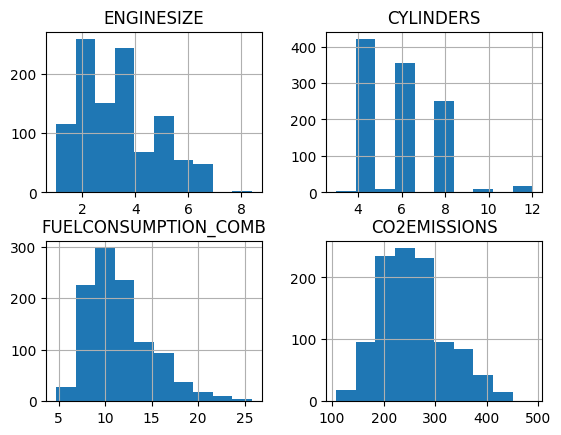

In [5]:
df_1.hist()

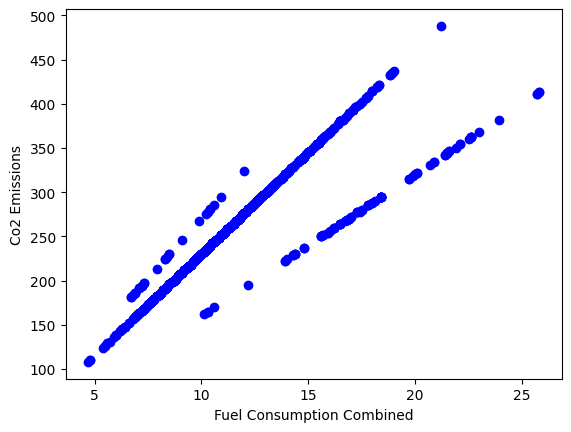

In [6]:
plt.scatter(df_1.FUELCONSUMPTION_COMB, df_1.CO2EMISSIONS, color='blue')
plt.xlabel('Fuel Consumption Combined')
plt.ylabel('Co2 Emissions')
plt.show()

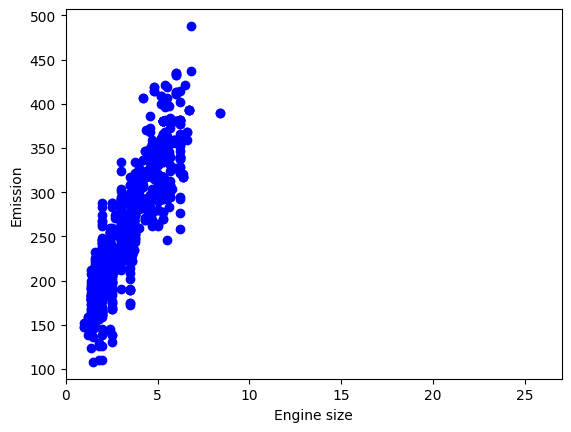

In [7]:
plt.scatter(df_1.ENGINESIZE, df_1.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.xlim(0,27)
plt.show()

## Extract the input feature and labels from the dataset¶

In [8]:
X = df_1.ENGINESIZE.to_numpy()
y = df_1.CO2EMISSIONS.to_numpy()

In [9]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)
print('shape of xTrain', xTrain.shape)
print('shape of xTest', xTest.shape)
print('shape of yTrain', yTrain.shape)
print('shape of yTest', yTest.shape)

shape of xTrain (853,)
shape of xTest (214,)
shape of yTrain (853,)
shape of yTest (214,)


In [10]:
type(xTrain)

numpy.ndarray

## Training Model

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg = LinearRegression()

reg.fit(xTrain.reshape(-1, 1), yTrain)

## print the coefficient

print('Coefficient:', reg.coef_[0])
print('Intercept:', reg.intercept_)

Coefficient: 38.992978724434074
Intercept: 126.28970217408721


## Visualize model outputs

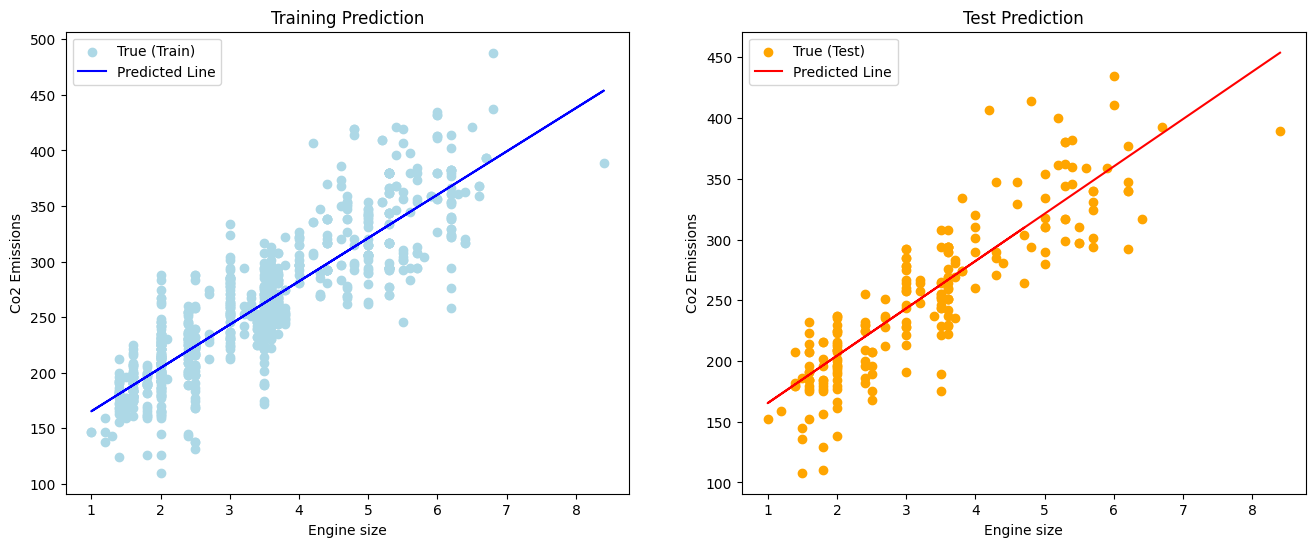

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

PredlineTrain = reg.intercept_ + reg.coef_[0] * xTrain
PredlineTest = reg.intercept_ + reg.coef_[0] * xTest

axes[0].scatter(xTrain, yTrain, color="lightblue", label="True (Train)")
axes[0].plot(xTrain, PredlineTrain, color="blue", label="Predicted Line")
axes[0].set_title('Training Prediction')
axes[0].set_xlabel('Engine size')
axes[0].set_ylabel('Co2 Emissions')
axes[0].legend()


axes[1].scatter(xTest, yTest, color="orange", label="True (Test)")
axes[1].plot(xTest, PredlineTest, color="red", label="Predicted Line")
axes[1].set_title('Test Prediction')
axes[1].set_xlabel('Engine size')
axes[1].set_ylabel('Co2 Emissions')
axes[1].legend()


plt.show()


## Model Evaluation

In [13]:
yTrainPred = reg.predict(xTrain.reshape(-1, 1))
yTestPred = reg.predict(xTest.reshape(-1, 1))

TrainMSE = mean_squared_error(yTrain, yTrainPred)
TestMSE = mean_squared_error(yTest, yTestPred)

print('Training MSE :', TrainMSE)
print('Test MSE :', TestMSE)

Training MSE : 936.7860103082572
Test MSE : 985.9381692274999


# Multiple Linear Regression

## Import needed packages

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the data

In [15]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(url)
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [16]:
df = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], axis=1)
df

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


In [17]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


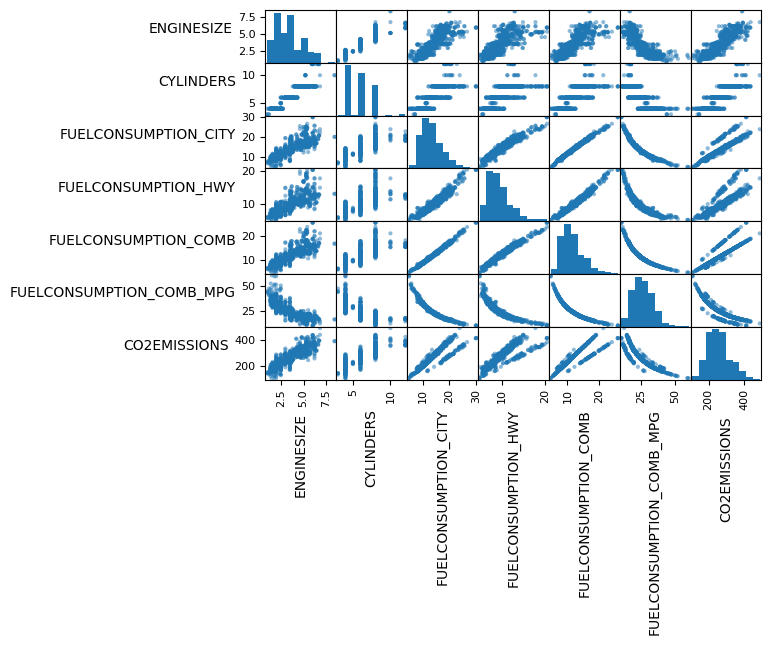

In [18]:
axes = pd.plotting.scatter_matrix(df)  

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

As you can see, the relationship between 'FUELCONSUMPTION_COMB_MPG' and 'CO2EMISSIONS' is non-linear. In addition, you can clearly see three different curves. This suggests exploring the categorical variables to see if they are able to explain these differences. Let's leave this as an exercise for you to explore deeper. Regarding the non-linearity, you will handle this in the next lab. For now, let's just consider through modeling whether fuel economy explains some of the variances in the target as is.

In [19]:
X = df.iloc[:, [0, 1]].to_numpy()
y = df.iloc[:, 2].to_numpy()

## Split data

In [20]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

## Preprocess selected features

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
xTrain_std = scaler.fit_transform(xTrain)
xTest_std = scaler.transform(xTest)

In [22]:
pd.DataFrame(xTrain_std).describe().round(2)

,0,1
count,853.00,853.00
mean,-0.00,0.00
std,1.00,1.00
min,-1.67,-1.55
25%,-0.96,-1.00
50%,0.03,0.11
75%,0.74,1.21
max,3.57,3.42


## Model Training

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def MSE(yTrain, yPred):
    squaredError = (yTrain - yPred) ** 2
    return np.mean(squaredError)
reg = LinearRegression()
reg.fit(xTrain_std, yTrain)

coef_ = reg.coef_
Intercept = reg.intercept_
print('Coefficient:', reg.coef_)
print('Intercept', reg.intercept_)

yPredTrain = reg.predict(xTrain)
yPredTest = reg.predict(xTest)

Train_MSE = MSE(yTrain, yPredTrain)
Test_MSE = MSE(yTrain, yPredTrain)

print("Training MSE", TrainMSE)
print("Test MSE", TestMSE)

Coefficient: [2.90758156 0.53666554]
Intercept 13.3525205158265
Training MSE 936.7860103082572
Test MSE 985.9381692274999


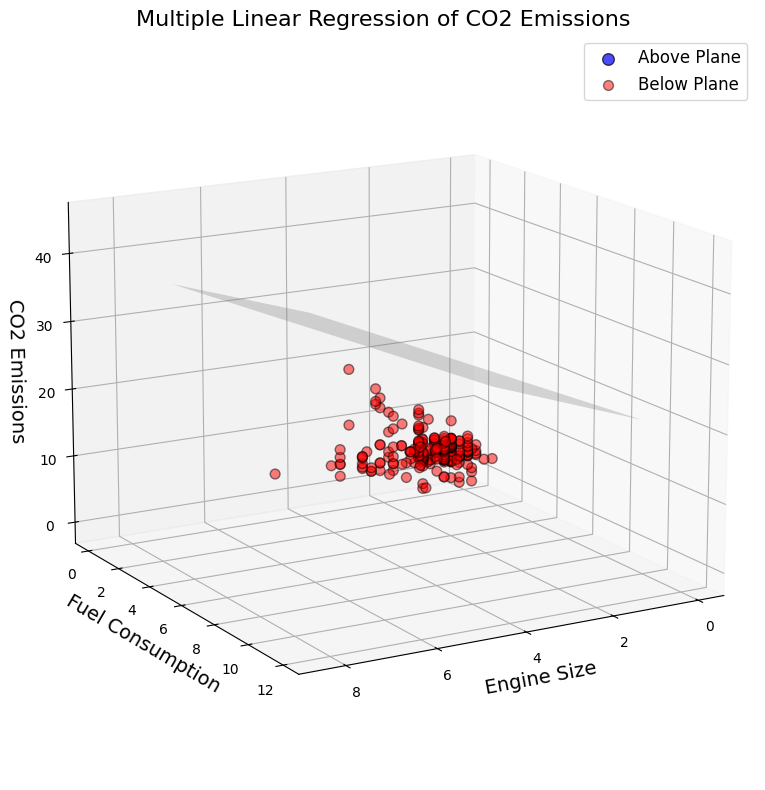

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 需要啟用 3D 繪圖

# 假設你已經有訓練好的 LinearRegression 模型 reg
# 且 xTest (n_samples, 2), yTest (n_samples, )

# 提取特徵
X1 = xTest[:, 0]
X2 = xTest[:, 1]

# 建立 meshgrid，用來畫平面
x1_surf, x2_surf = np.meshgrid(
    np.linspace(X1.min(), X1.max(), 100),
    np.linspace(X2.min(), X2.max(), 100)
)

# 計算回歸平面上的 y 值
y_surf = (reg.intercept_
          + reg.coef_[0] * x1_surf
          + reg.coef_[1] * x2_surf)

# 預測測試集
y_pred = reg.predict(xTest)

# 標記點在平面上方或下方
above_plane = (yTest >= y_pred).ravel()
below_plane = (yTest < y_pred).ravel()

# 開始畫圖
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

# 畫出真實點
ax.scatter(X1[above_plane], X2[above_plane], yTest[above_plane],
           color="blue", label="Above Plane", s=70, alpha=0.7, edgecolor='k')
ax.scatter(X1[below_plane], X2[below_plane], yTest[below_plane],
           color="red", label="Below Plane", s=50, alpha=0.5, edgecolor='k')

# 畫出回歸平面
ax.plot_surface(x1_surf, x2_surf, y_surf,
                color='gray', alpha=0.3)

# 設定視角、標籤
ax.view_init(elev=15, azim=60)
ax.set_xlabel('Engine Size', fontsize=14)
ax.set_ylabel('Fuel Consumption', fontsize=14)
ax.set_zlabel('CO2 Emissions', fontsize=14)
ax.set_title('Multiple Linear Regression of CO2 Emissions', fontsize=16)

ax.legend(fontsize=12, loc='upper right')
plt.tight_layout()
plt.show()
